In [1]:
from typing import List
from merkletree import Merkle_Tree, hash_data
from time import time
import matplotlib.pyplot as plt

13.4.1
Poseidon GPU digest: 11215558496172652508


In [2]:
    num_leaf_list = [1, 4, 16, 64, 128, 256, 1024, 2048]
    hash_functions = ["SHA3_CPU", "POSEIDON_CPU", "SHA3_GPU", "POSEIDON_GPU"]

    build_times = {h: [] for h in hash_functions}
    verify_times = {h: [] for h in hash_functions}

    for n in num_leaf_list:
        data_blocks = [f"element{i}" for i in range(n)]

        for h in hash_functions:
            # Tree generation timing
            start_time = time()
            tree = Merkle_Tree(data_blocks, h)
            build_time = time() - start_time

            # Proof generation and verification timing
            target = hash_data(data_blocks[0], h)
            proof = tree.get_proof(target)

            start_time = time()
            is_valid = Merkle_Tree.verify_proof(target, proof, tree.root.hash, h)
            verify_time = time() - start_time

            build_times[h].append(build_time)
            verify_times[h].append(verify_time)

            print(f"n={n}, hash={h}, build={build_time:.4f}s, verify={verify_time:.6f}s, valid={is_valid}")


n=1, hash=SHA3_CPU, build=0.1010s, verify=0.053378s, valid=True
n=1, hash=POSEIDON_CPU, build=0.0904s, verify=0.018744s, valid=True
n=1, hash=SHA3_GPU, build=0.0652s, verify=0.022294s, valid=True
n=1, hash=POSEIDON_GPU, build=0.0351s, verify=0.017201s, valid=True
n=4, hash=SHA3_CPU, build=0.3510s, verify=0.101183s, valid=True
n=4, hash=POSEIDON_CPU, build=0.1305s, verify=0.036572s, valid=True
n=4, hash=SHA3_GPU, build=0.1567s, verify=0.046276s, valid=True
n=4, hash=POSEIDON_GPU, build=0.1202s, verify=0.034407s, valid=True
n=16, hash=SHA3_CPU, build=1.5949s, verify=0.205391s, valid=True
n=16, hash=POSEIDON_CPU, build=0.5688s, verify=0.072856s, valid=True
n=16, hash=SHA3_GPU, build=0.6921s, verify=0.088734s, valid=True
n=16, hash=POSEIDON_GPU, build=0.5354s, verify=0.068351s, valid=True
n=64, hash=SHA3_CPU, build=6.5467s, verify=0.311002s, valid=True
n=64, hash=POSEIDON_CPU, build=2.2984s, verify=0.107851s, valid=True
n=64, hash=SHA3_GPU, build=2.8111s, verify=0.132655s, valid=True
n=64,

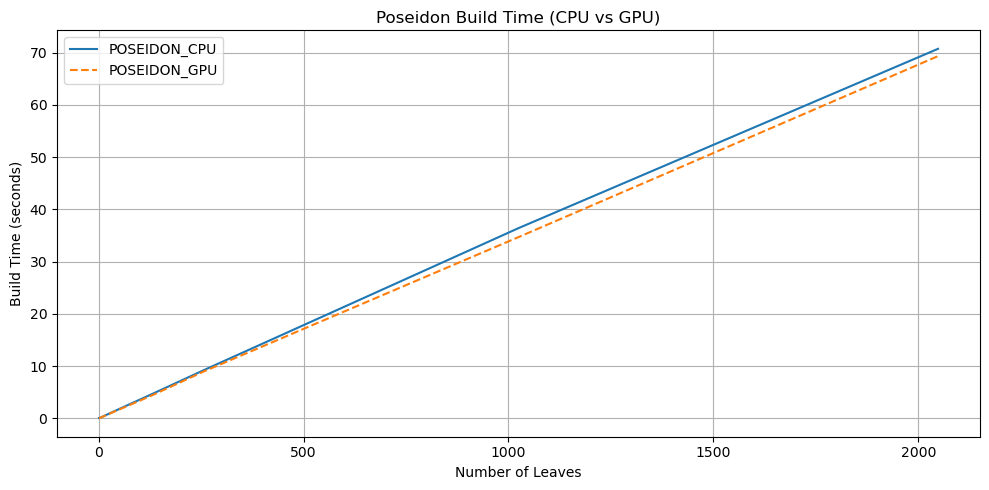

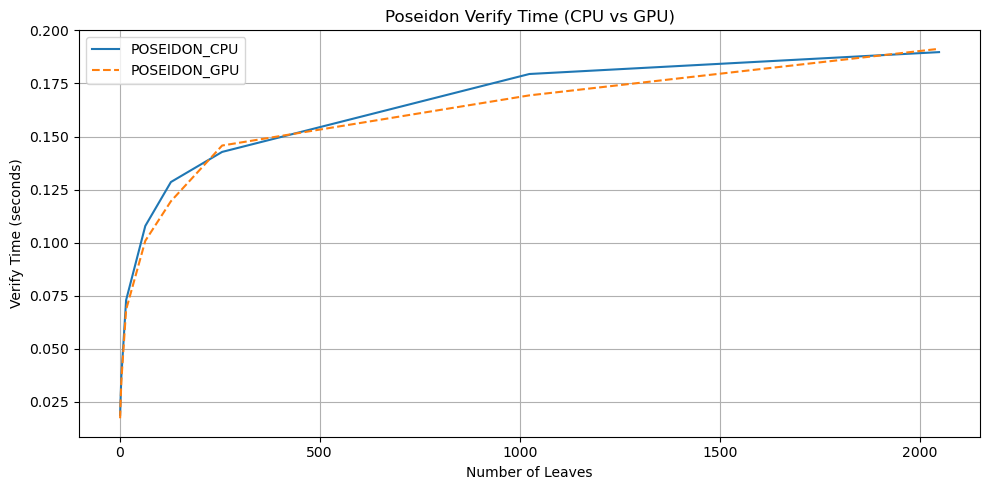

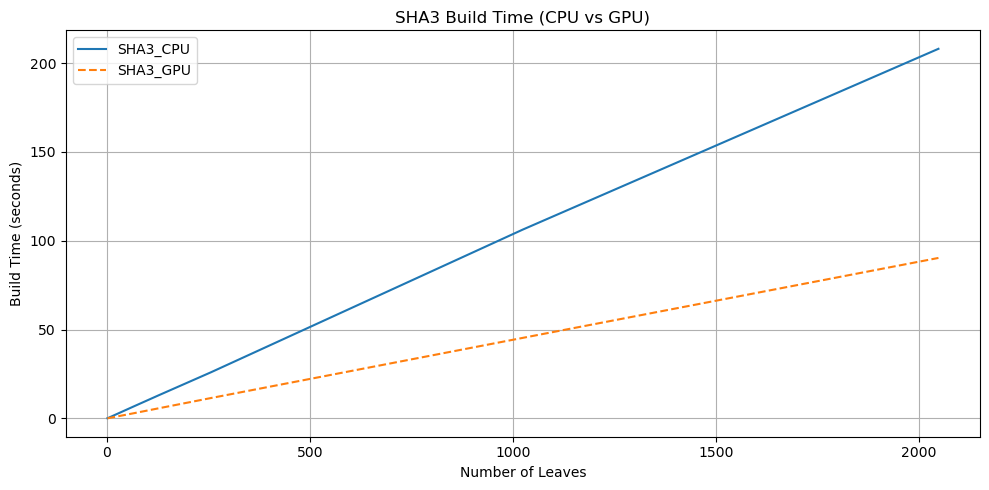

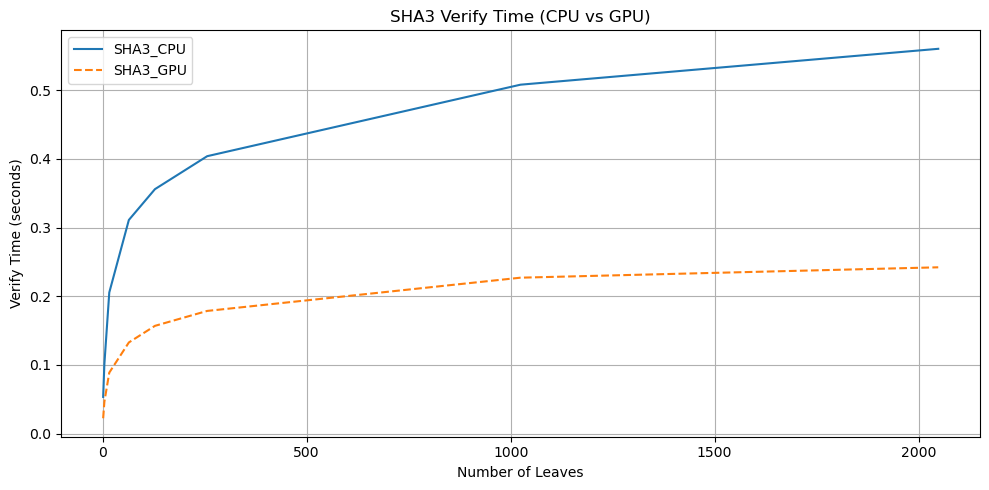

In [4]:
def plot_metric(title, hash_list, metric_dict, ylabel, filename=None):
    plt.figure(figsize=(10, 5))
    for h in hash_list:
        linestyle = '--' if 'GPU' in h else '-'
        plt.plot(num_leaf_list, metric_dict[h], label=h, linestyle=linestyle)

    # plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel("Number of Leaves")
    plt.ylabel(f"{ylabel} (seconds)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

# Poseidon plots
poseidon = ["POSEIDON_CPU", "POSEIDON_GPU"]
plot_metric("Poseidon Build Time (CPU vs GPU)", poseidon, build_times, "Build Time", "poseidon_build.png")
plot_metric("Poseidon Verify Time (CPU vs GPU)", poseidon, verify_times, "Verify Time", "poseidon_verify.png")

# SHA3 plots
sha3 = ["SHA3_CPU", "SHA3_GPU"]
plot_metric("SHA3 Build Time (CPU vs GPU)", sha3, build_times, "Build Time", "sha3_build.png")
plot_metric("SHA3 Verify Time (CPU vs GPU)", sha3, verify_times, "Verify Time", "sha3_verify.png")